In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
day = 24 * 60 * 60
year = 365.2425 * day


def generate_sinusoidal() -> pd.DataFrame:
    """ Create a time series x sin wave dataframe. """
    df = pd.DataFrame(columns=['date', 'sin'])
    df.date = pd.date_range(start='1700-01-01', end='2021-03-01', freq='D')
    df.sin = 1 + np.sin(df.date.view('int64') // 1e9 * (2 * np.pi / year))
    df.sin = (df.sin * 100).round(2)
    df.date = df.date.apply(lambda d: d.strftime('%Y-%m-%d'))
    df.index = df.date
    df = df.sin.to_frame()
    return df

def add_asymetric_noise(x: pd.DataFrame, threshold: float = 100) -> pd.DataFrame:
    """"""
    scale = np.log((x - threshold)**2+0.001)*2
    if x > threshold:
        x -= np.abs(np.random.normal()) * scale
    else:
        x += np.abs(np.random.normal()) * scale
    return x
    
synthetic_dataset = generate_sinusoidal()
synthetic_dataset.head()

,sin
date,
1700-01-01,100.82
1700-01-02,102.54
1700-01-03,104.26
1700-01-04,105.97
1700-01-05,107.69


<AxesSubplot:xlabel='date'>

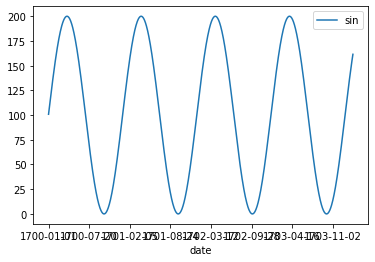

In [3]:
synthetic_dataset.iloc[:1500].plot()

<AxesSubplot:xlabel='date'>

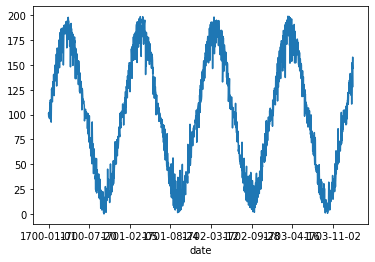

In [4]:
THRESHOLD = 100
synthetic_dataset = synthetic_dataset.sin.apply(add_asymetric_noise, args=(THRESHOLD,))
synthetic_dataset.iloc[:1500].plot()

In [5]:
synthetic_dataset.to_csv("datasets/synthetic_sin_w_asym_noise.csv")